In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Reading the Titanic dataset from a CSV file
titanc_df = pd.read_csv("/content/drive/MyDrive/titanic.csv.xls")

In [33]:
titanc_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
# Creating new dataframe (additional_info)
additional_info_df = pd.DataFrame({ 'PassengerId': [1, 2, 3, 4, 5],
'HomeCountry': ['USA', 'UK', 'France', 'Germany', 'Canada'] })
additional_info_df

,PassengerId,HomeCountry
0,1,USA
1,2,UK
2,3,France
3,4,Germany
4,5,Canada


In [49]:
# Merge the two dataframes (titanc_df, additional_info)
df_merged = pd.merge(titanc_df, additional_info_df, how='left', on='PassengerId')
df_merged

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HomeCountry
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,USA
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,UK
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,France
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Germany
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,NaN


In [50]:
# Split the DataFrame df into two DataFrames
# df_train containing 70% of the data
# df_test containing  30% of the data
df_train = df_merged.sample(frac=0.7, random_state=42)
df_test = df_merged.drop(df_train.index)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HomeCountry
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,NaN
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,NaN
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,NaN
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,NaN
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q,NaN
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,NaN,S,NaN
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,NaN
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S,NaN


In [56]:
# Calculating the average fare Paid
df_merged["Fare"].mean()
# Adding FareDifference column to the dataframe
df_merged["FareDifference"] = df_merged["Fare"] - df_merged["Fare"].mean()

In [57]:
df_merged

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HomeCountry,Fare_avg_difference,FareDifference
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,USA,-24.954208,-24.954208
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,UK,39.079092,39.079092
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,France,-24.279208,-24.279208
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Germany,20.895792,20.895792
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Canada,-24.154208,-24.154208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,-19.204208,-19.204208
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,NaN,-2.204208,-2.204208
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,-8.754208,-8.754208
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,NaN,-2.204208,-2.204208


In [72]:
# Creating a dataframe containing only the femlaes over the age of 60
df_female_over_60 = df_merged.loc[(df_merged["Age"] >= 60) & (df_merged["Sex"] == "female")]
df_female_over_60


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HomeCountry,Fare_avg_difference,FareDifference
33,34,0,2,"Wheadon, Mr. Edward H",female,66.0,0,0,C.A. 24579,10.5000,NaN,S,NaN,-21.704208,-21.704208
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",female,65.0,0,1,113509,61.9792,B30,C,NaN,29.774992,29.774992
96,97,0,1,"Goldschmidt, Mr. George B",female,71.0,0,0,PC 17754,34.6542,A5,C,NaN,2.449992,2.449992
116,117,0,3,"Connors, Mr. Patrick",female,70.5,0,0,370369,7.7500,NaN,Q,NaN,-24.454208,-24.454208
170,171,0,1,"Van der hoef, Mr. Wyckoff",female,61.0,0,0,111240,33.5000,B19,S,NaN,1.295792,1.295792
252,253,0,1,"Stead, Mr. William Thomas",female,62.0,0,0,113514,26.5500,C87,S,NaN,-5.654208,-5.654208
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,NaN,45.754092,45.754092
280,281,0,3,"Duane, Mr. Frank",female,65.0,0,0,336439,7.7500,NaN,Q,NaN,-24.454208,-24.454208
326,327,0,3,"Nysveen, Mr. Johan Hansen",female,61.0,0,0,345364,6.2375,NaN,S,NaN,-25.966708,-25.966708
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C,NaN,43.045792,43.045792


In [73]:
# Selecting the Name and Age of the dataframe
df_female_over_60[["Name","Age"]]

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
170,"Van der hoef, Mr. Wyckoff",61.0
252,"Stead, Mr. William Thomas",62.0
275,"Andrews, Miss. Kornelia Theodosia",63.0
280,"Duane, Mr. Frank",65.0
326,"Nysveen, Mr. Johan Hansen",61.0
366,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",60.0


In [77]:
# Selecting Age column
df_merged["Age"]
# Convert Age column to a numpy array
age_numpy = df_merged["Age"].to_numpy()
# Displaying the first 10 ages of the passengers
age_numpy[0:10]

array([22., 38., 26., 35., 35., nan, 54.,  2., 27., 14.])

In [98]:
#Grouping the titanc dataframe by Pclass
df_pclass_group = df_merged.groupby("Pclass")
# Calculating the Average age for each Pclass Group
df_pclass_group["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [103]:
#Calculating the Median Age
median_age = df_merged['Age'].median()
median_age


28.0

In [105]:
# Fill missing values in the Age column with the median age
df_merged['Age'].fillna(median_age)

# Remove duplicate rows
df_merged.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HomeCountry,Fare_avg_difference,FareDifference
0,1,0,3,"Braund, Mr. Owen Harris",female,22.0,1,0,A/5 21171,7.2500,NaN,S,USA,-24.954208,-24.954208
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,UK,39.079092,39.079092
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,France,-24.279208,-24.279208
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Germany,20.895792,20.895792
4,5,0,3,"Allen, Mr. William Henry",female,35.0,0,0,373450,8.0500,NaN,S,Canada,-24.154208,-24.154208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",female,27.0,0,0,211536,13.0000,NaN,S,NaN,-19.204208,-19.204208
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,NaN,-2.204208,-2.204208
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,NaN,-8.754208,-8.754208
889,890,1,1,"Behr, Mr. Karl Howell",female,26.0,0,0,111369,30.0000,C148,C,NaN,-2.204208,-2.204208


In [109]:
# Scale the Fare column using StandardScaler from scikit-learn

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the Fare column
df_merged['Fare'] = scaler.fit_transform(df_merged[['Fare']])

df_merged

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HomeCountry,Fare_avg_difference,FareDifference
0,1,0,3,"Braund, Mr. Owen Harris",female,22.0,1,0,A/5 21171,-0.502445,NaN,S,USA,-24.954208,-24.954208
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.786845,C85,C,UK,39.079092,39.079092
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,-0.488854,NaN,S,France,-24.279208,-24.279208
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.420730,C123,S,Germany,20.895792,20.895792
4,5,0,3,"Allen, Mr. William Henry",female,35.0,0,0,373450,-0.486337,NaN,S,Canada,-24.154208,-24.154208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",female,27.0,0,0,211536,-0.386671,NaN,S,NaN,-19.204208,-19.204208
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,-0.044381,B42,S,NaN,-2.204208,-2.204208
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,-0.176263,NaN,S,NaN,-8.754208,-8.754208
889,890,1,1,"Behr, Mr. Karl Howell",female,26.0,0,0,111369,-0.044381,C148,C,NaN,-2.204208,-2.204208


In [ ]:
#One Hot Encoding



Text(0, 0.5, 'Count')

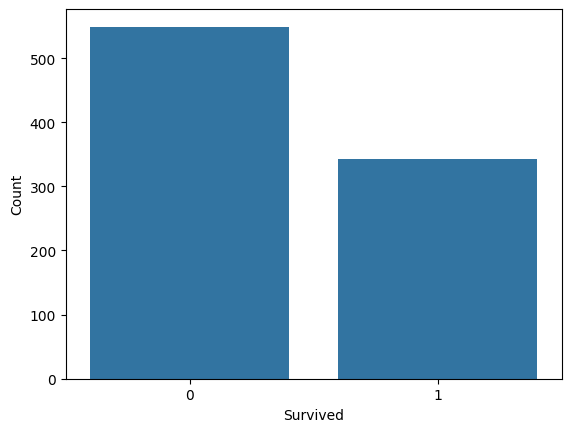

In [114]:
# Creating count plot using seaborn

sns.countplot(x='Survived', data=df_merged)

plt.xlabel('Survived')
plt.ylabel('Count')


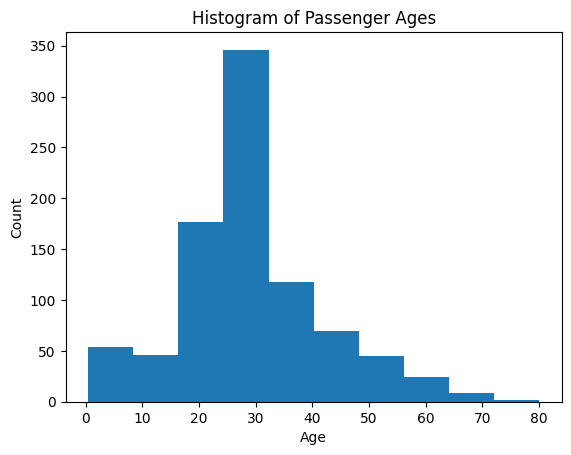

In [119]:
# Creating a histogram of passenger ages Using matplotlib
plt.hist(df_merged['Age'])

# Add title and labels
plt.title('Histogram of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()

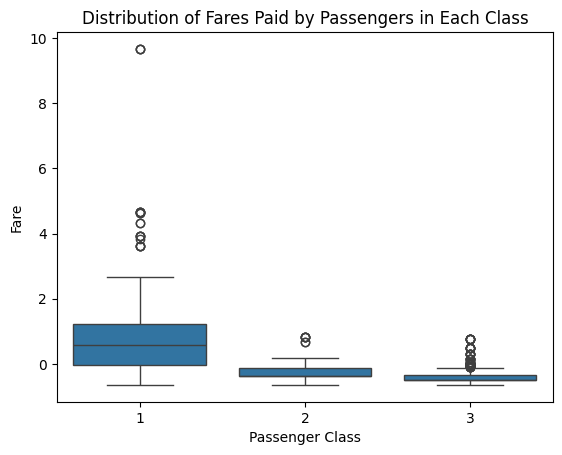

In [120]:
# Create a box plot of fares by passenger class
sns.boxplot(x='Pclass', y='Fare', data=df_merged)

# Add title and labels
plt.title('Distribution of Fares Paid by Passengers in Each Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')

# Show the plot
plt.show()

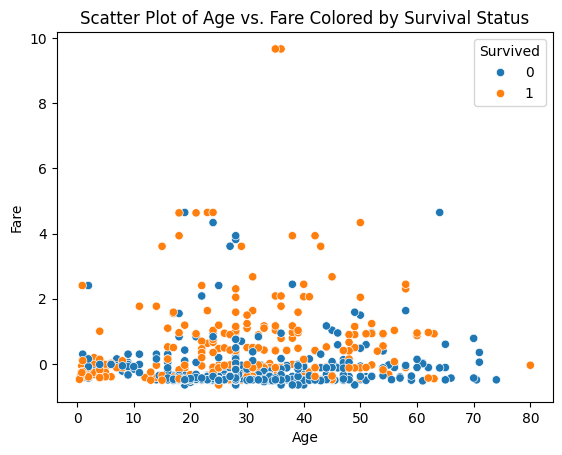

In [125]:
# Create a scatter plot of Age vs. Fare, colored by Survived
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df_merged)

# Add title and labels
plt.title('Scatter Plot of Age vs. Fare Colored by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')

# Show the plot
plt.show()

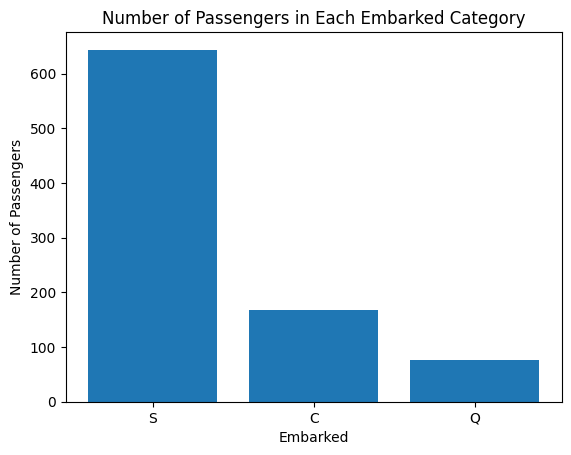

In [129]:
# Claculate Count number of passengers in each Embarked category
embarked_counts = df_merged['Embarked'].value_counts()

# Create a bar plot of the number of passengers in each Embarked category
plt.bar(embarked_counts.index, embarked_counts.values)

# Add title and labels
plt.title('Number of Passengers in Each Embarked Category')
plt.xlabel('Embarked')
plt.ylabel('Number of Passengers')

# Show the plot
plt.show()